In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
advertising= pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
advertising.shape

(200, 4)

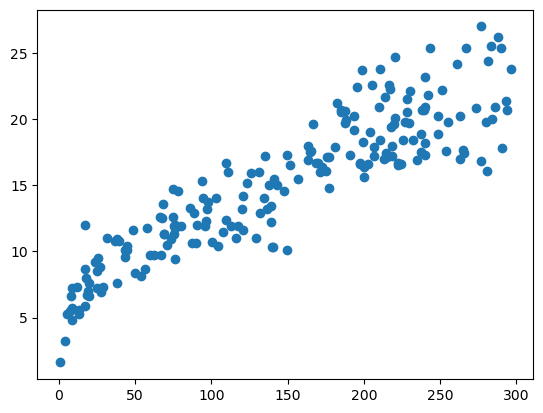

In [11]:
plt.scatter(data=advertising, x='TV', y='Sales')
plt.show()

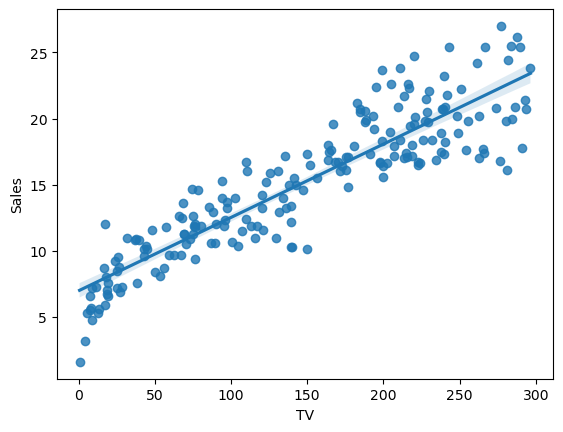

In [15]:
sns.regplot(data=advertising, x='TV', y='Sales')
plt.show()

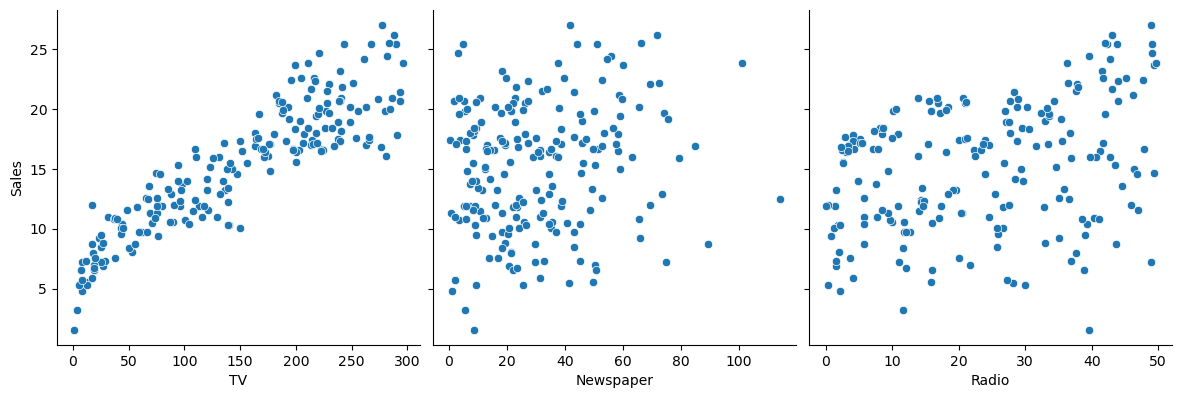

In [23]:
sns.pairplot(data=advertising, x_vars=['TV','Newspaper','Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

<AxesSubplot:>

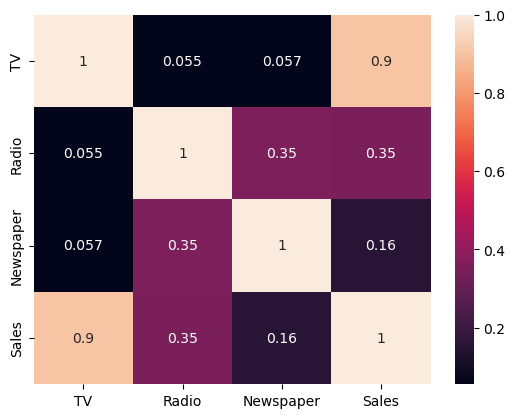

In [27]:
sns.heatmap(advertising.corr(), annot= True)

In [28]:
x=advertising['TV']
y = advertising['Sales']

In [29]:
from sklearn.model_selection  import train_test_split
import statsmodels.api as sm

In [30]:
X_train, X_test, y_train, y_test= train_test_split(x,y,train_size=.7, test_size=.3, random_state=100)


In [31]:
X_train.shape

(140,)

In [32]:
y_train.shape

(140,)

In [35]:
X_train_sm= sm.add_constant(X_train)

In [36]:
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [37]:
lr=sm.OLS(y_train, X_train_sm).fit()

In [39]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
B0= (intercept)= 6.94
B1= slope - 0.05

In [40]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           1.52e-52
Time:                        21:08:58   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

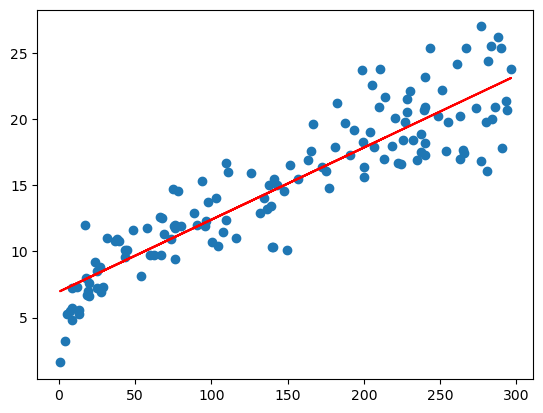

In [42]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9487+0.0545*X_train, 'r')
plt.show()

In [43]:
y_train_pred= lr.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [44]:
res= y_train-y_train_pred

c:\Users\ziyae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

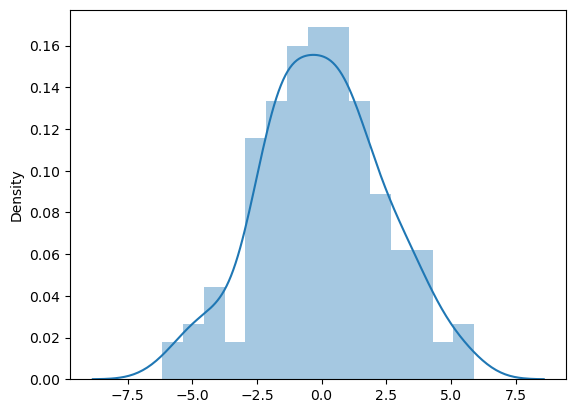

In [51]:
fig=plt.figure()
sns.distplot(res, bins=15)

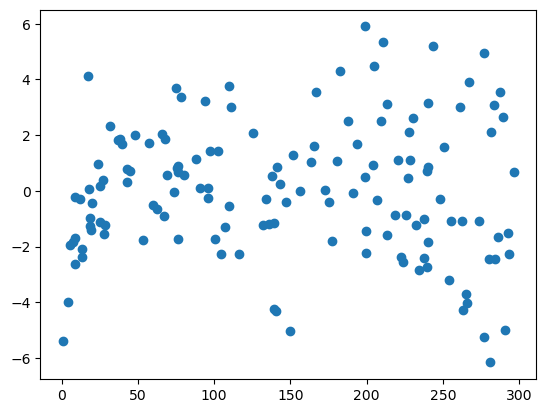

In [52]:
plt.scatter(X_train,res)

In [53]:
X_test_sm= sm.add_constant(X_test)

In [55]:
y_test_pred= lr.predict(X_test_sm)

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [57]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

2.019296008966233

In [58]:
r2_score(y_test, y_test_pred)

0.7921031601245658

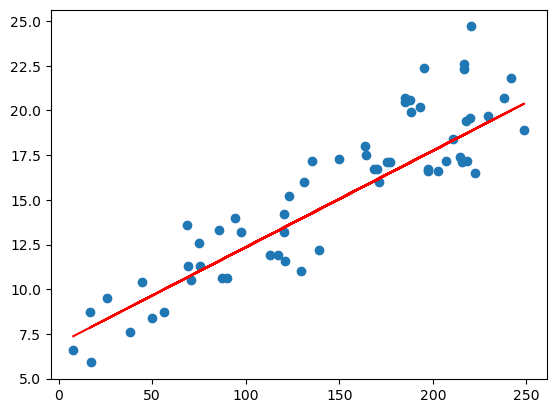

In [59]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

In [61]:
X_train_lm, X_test_lm, y_train_lm, y_test_lm= train_test_split(x, y, train_size=.7, test_size=.3, random_state=100)

In [62]:
X_train_lm.shape

(140,)

In [84]:

X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)  

y_train_lm = y_train_lm.values.reshape(-1,1)
y_test_lm = y_test_lm.values.reshape(-1,1)


In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr= LinearRegression()

In [73]:
lr.fit(X_test_lm, y_test_lm)

LinearRegression()

In [74]:
print(lr.coef_)
print(lr.intercept_)

[0.05976637]
6.726755044956088


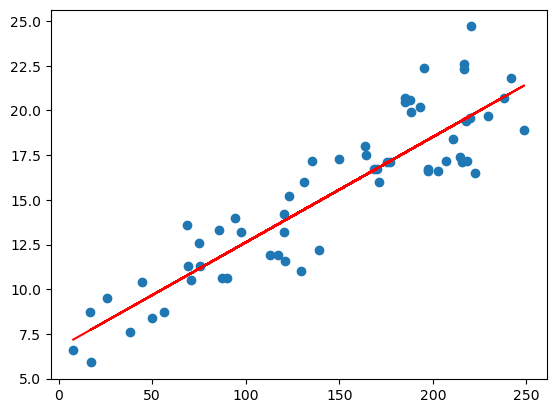

In [75]:
plt.scatter(X_test_lm, y_test_lm)
plt.plot(X_test_lm, 6.72+.059*X_test_lm, 'r')
plt.show()

In [89]:
y_train_lm_pred= lr.predict(X_train_lm)
y_test_lm_pred= lr.predict(X_test_lm)

In [90]:
r2_score(y_train_lm, y_train_lm_pred)

0.7986609100177458

In [91]:
r2_score(y_test_lm, y_test_lm_pred)

0.813041007809068